In [12]:
import geopandas as gpd

In [13]:
counties = gpd.read_file(
    "../output/counties_simple/counties_simple.shp"
)

In [14]:
counties.head(5)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((246290.0411551894 -328619.667039162,..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,680956809,61588406,+46.2946377,-123.4244583,POLYGON ((-1770686.983550074 398793.6640856052...
2,35,011,00933054,35011,De Baca,De Baca County,6016819484,29089486,+34.3592729,-104.3686961,POLYGON ((-422754.4474200015 -1210188.44889264...
3,31,109,00835876,31109,Lancaster,Lancaster County,2169287528,22832516,+40.7835474,-096.6886584,"POLYGON ((260193.976508197 -463717.0213689978,..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,1489645187,1718484,+40.1764918,-098.0468422,POLYGON ((146978.4586902861 -544334.3005906644...


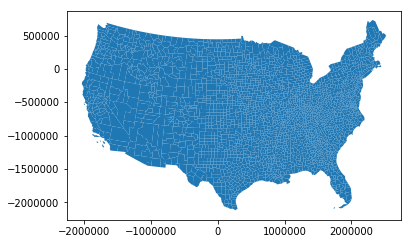

In [15]:
counties.plot();

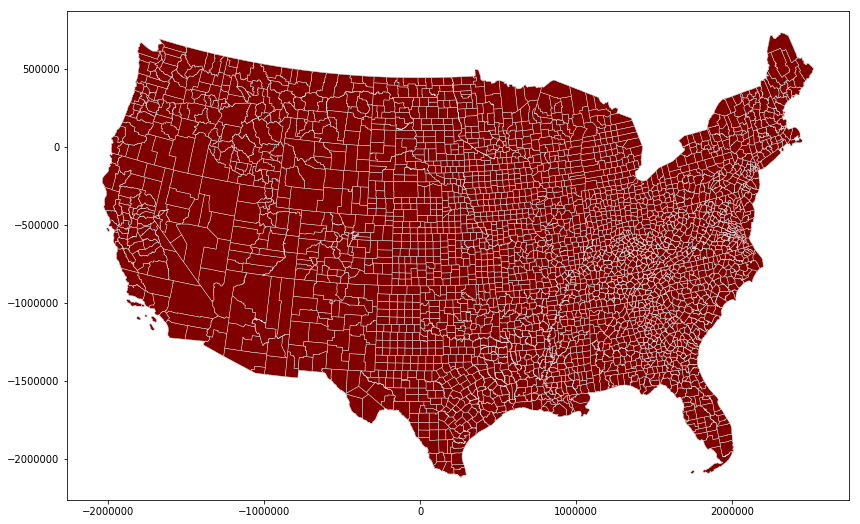

In [16]:
counties.plot(
    figsize = (16, 9),
    color = "maroon",
    edgecolor = "lightgray",
    linewidth = 0.5
);

In [17]:
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((246290.0411551894 -328619.667039162,..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,680956809,61588406,+46.2946377,-123.4244583,POLYGON ((-1770686.983550074 398793.6640856052...
2,35,011,00933054,35011,De Baca,De Baca County,6016819484,29089486,+34.3592729,-104.3686961,POLYGON ((-422754.4474200015 -1210188.44889264...
3,31,109,00835876,31109,Lancaster,Lancaster County,2169287528,22832516,+40.7835474,-096.6886584,"POLYGON ((260193.976508197 -463717.0213689978,..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,1489645187,1718484,+40.1764918,-098.0468422,POLYGON ((146978.4586902861 -544334.3005906644...


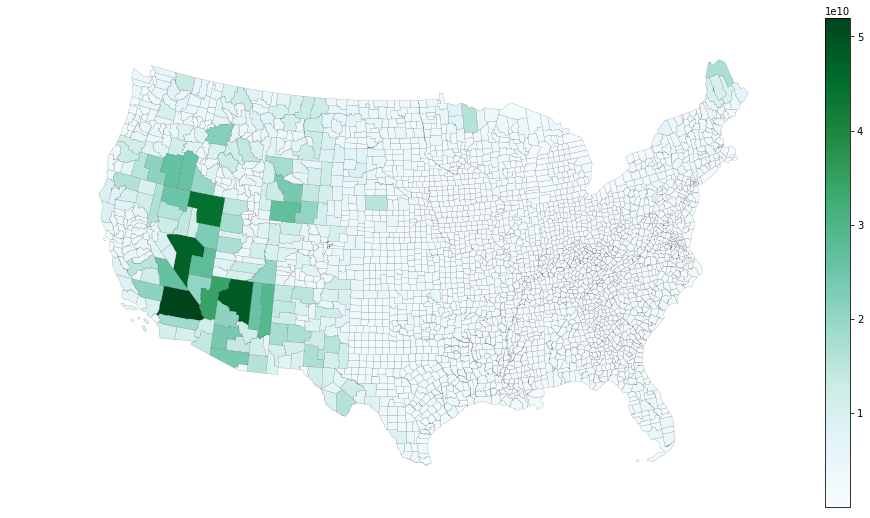

In [18]:
counties.plot(
    figsize = (16, 9),
    column = "ALAND",
    cmap = "BuGn", # https://matplotlib.org/users/colormaps.html
    edgecolor = "black",
    linewidth = 0.1,
    legend = True
).axis("off");